#**The task of predicting the churn of telecom company's customers.**

In this task you will know how to model the churn of a telecom company's customers. This task is very important in practice and algorithms for solving it are used in real telecom companies, because if we know that the client is going to leave us, then we will try to keep him by offering some bonuses. As data we have two files train.csv (contains feature columns and target variable) and test.csv (contains feature columns only). As an answer, we need to download the customer churn predictions for test.csv. An example of a prediction file is submission.csv.

* train.csv - a file with a training set.
* test.csv - a file with a test set.
* submission.csv - an example of a submission.

# Metric

Before solving any problem, it is important to understand how your solution will be evaluated. In this case, we use the standard ROC-AUC metric for the classification problem. It can be calculated using only predicted probabilities and true classes without a specific classification threshold + it works even if the classes in the data are highly unbalanced (there are dozens of times more examples of one class than examples of the other). That is why it is very convenient for competitions.


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [ ]:
%matplotlib inline

In [ ]:

from sklearn.metrics import roc_auc_score

y_true = [0, 1, 1, 0, 1]
y_predictions = [0.1, 0.9, 0.4, 0.6, 0.61]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Exporatory data analysis (EDA)

## Data uploading

1) Firstly, we look at random lines.

2) Secondly, if there are empty values (NaN) in the dataset using data.isna() or data.info() and, if necessary, we will replace them with something. It will be good if we build a table with the number of NaN in each column.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('./train.csv')

data = data.replace('?', np.nan)
data = data.replace('', np.nan)
data = data.replace(' ', np.nan)

data.info()
data.isna()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [ ]:
# Select columns with different types, like numbered and categorial features
# Numbered features
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Categorial features
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

feature_cols
target_col

'Churn'

In [ ]:
data = data.loc[data['TotalSpent'] != ' ']

data['TotalSpent'] = data.TotalSpent.astype(float)

print(data.shape)
data = data.replace('?', np.nan)
data = data.replace('', np.nan)
data = data.replace(' ', np.nan)

data = data.dropna()
data = data.drop_duplicates()

(5282, 20)


## EDA

1) For numerical features, we will build a histogram (*plt.hist(...)*) or boxplot (*plt.boxplot(...)*). For categorical, we will count the amount of each value for each feature. For each column, we need to do *data.value_counts()* and build bar charts *plt.bar(...)* or pie charts *plt.pie(...)* (we will try to do it on one chart using *plt.subplots(...)*).

2) Then we will look at the distribution of the target variable and say if the classes are unbalanced.

3) Afterall, we will play around with different visualization libraries - *sns*, *pandas_visual_analysis*, etc.


The second point is very important because there are classification problems with unbalanced classes. For example, this may mean that there are many more class 0 examples in the dataset. In such cases, we need to 1) do not use accuracy as a metric 2) use methods to deal with unbalanced dataset (usually if the dataset is highly unbalanced, i.e. class 1 is 20 times less than class 0).

/tmp/ipykernel_55848/3987644857.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ClientPeriod                  72
MonthlySpending             1466
TotalSpent                  4977
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64
0    3885
1    1374
Name: Churn, dtype: int64


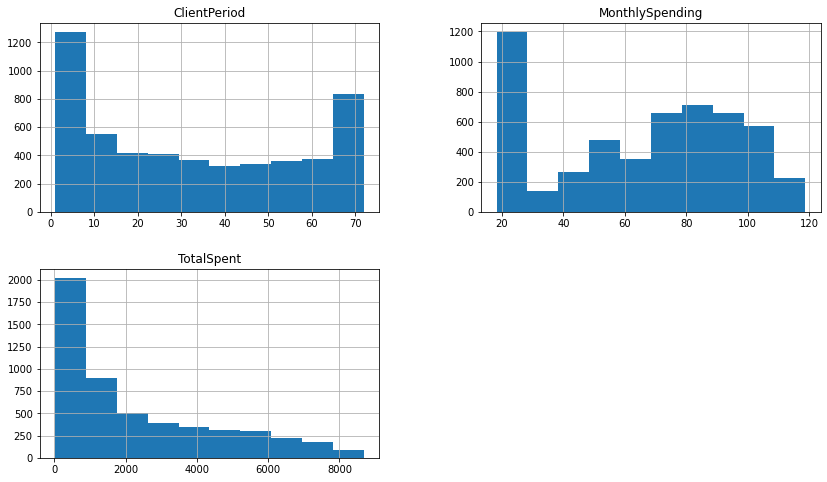

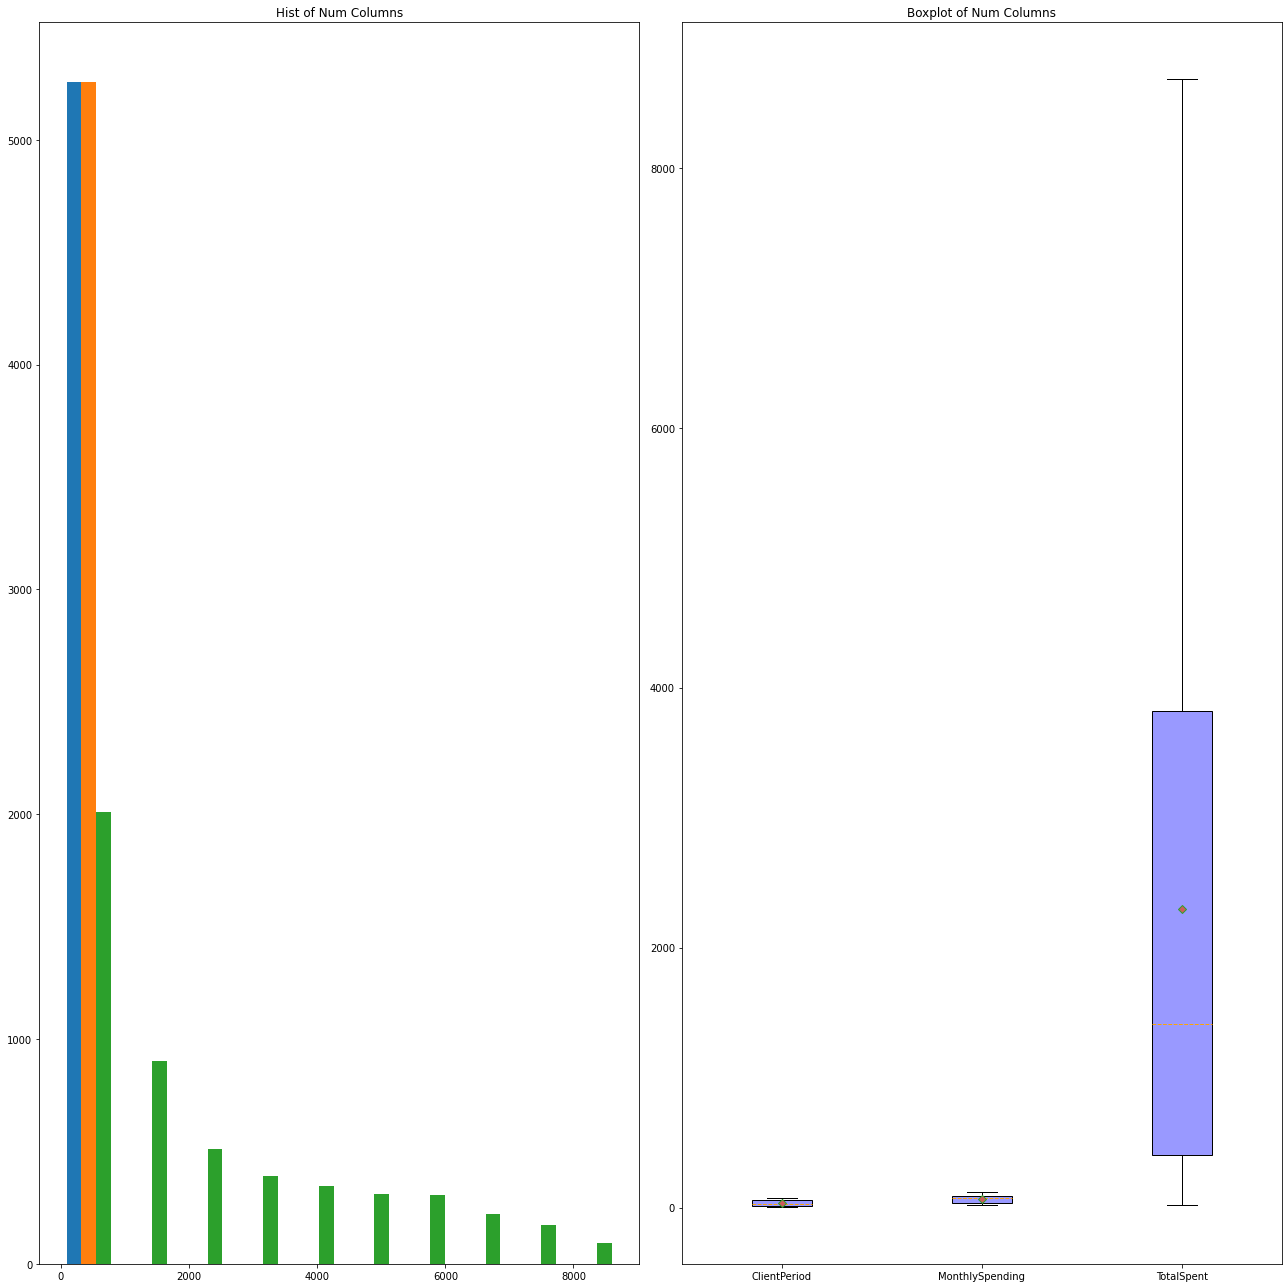

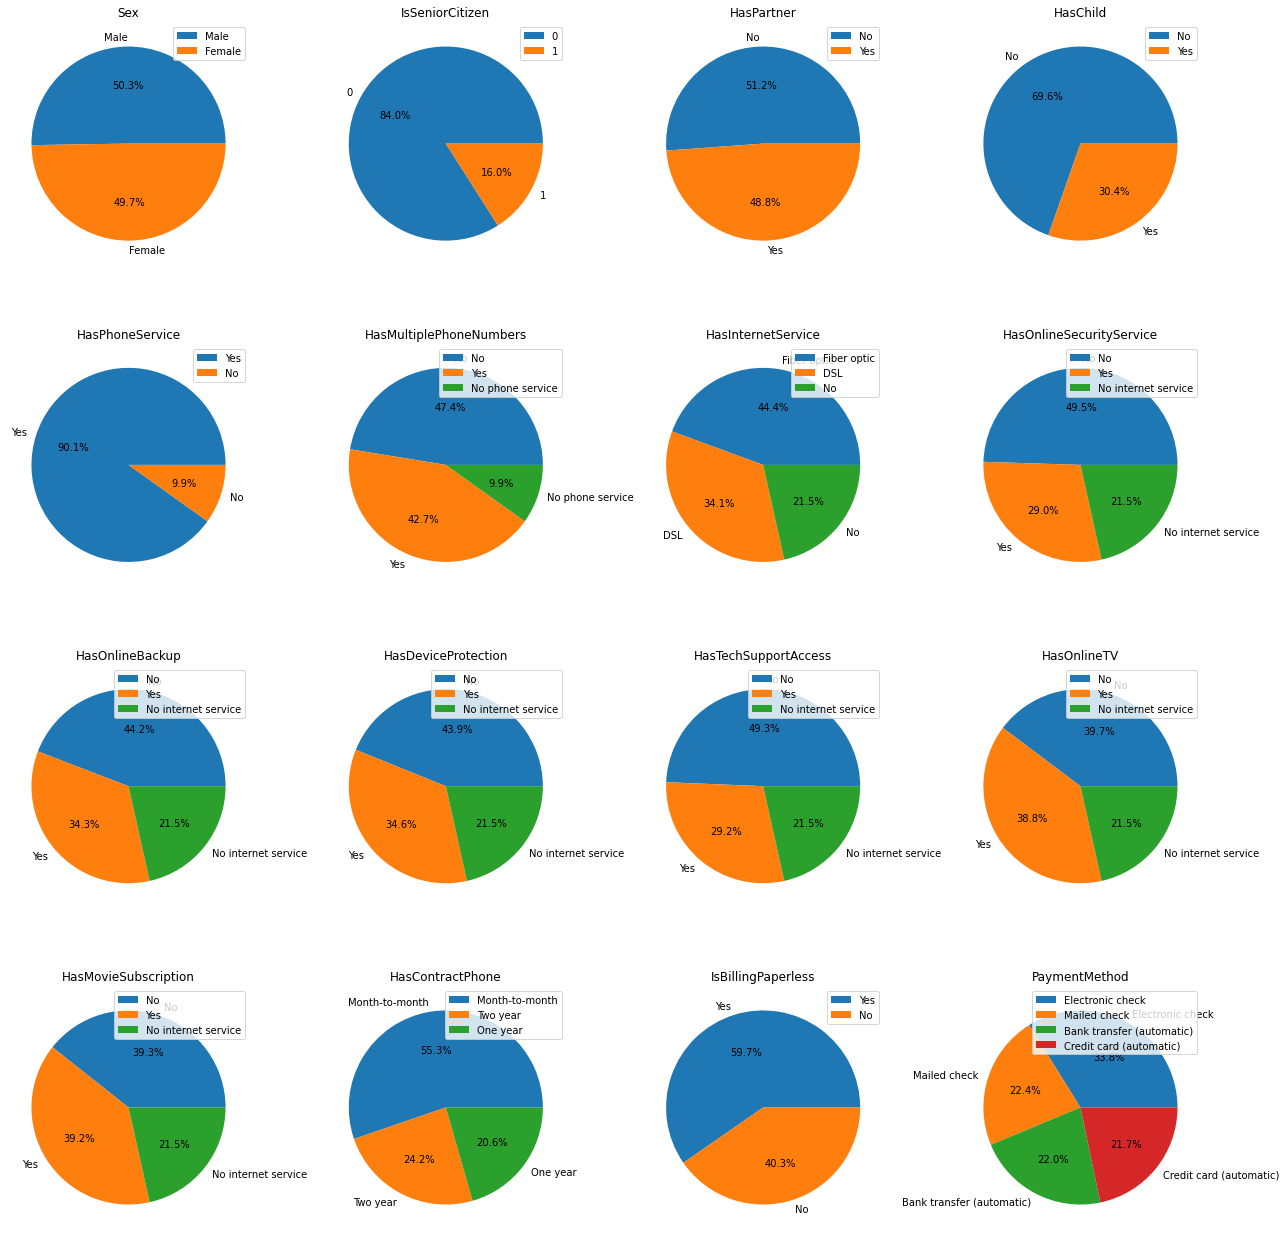

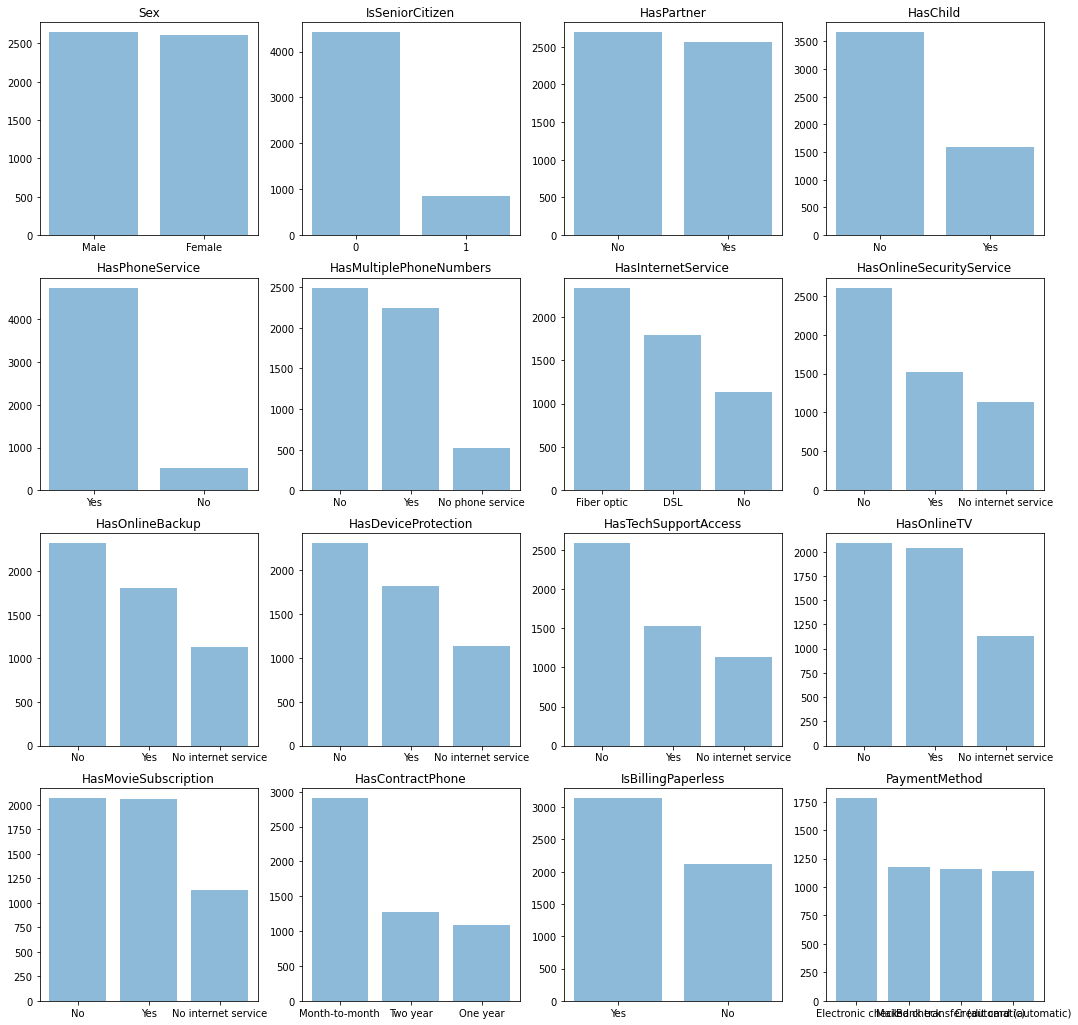

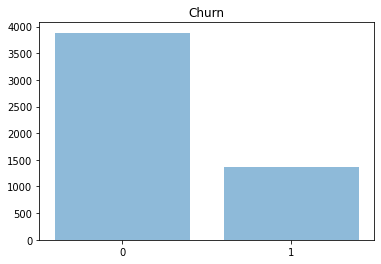

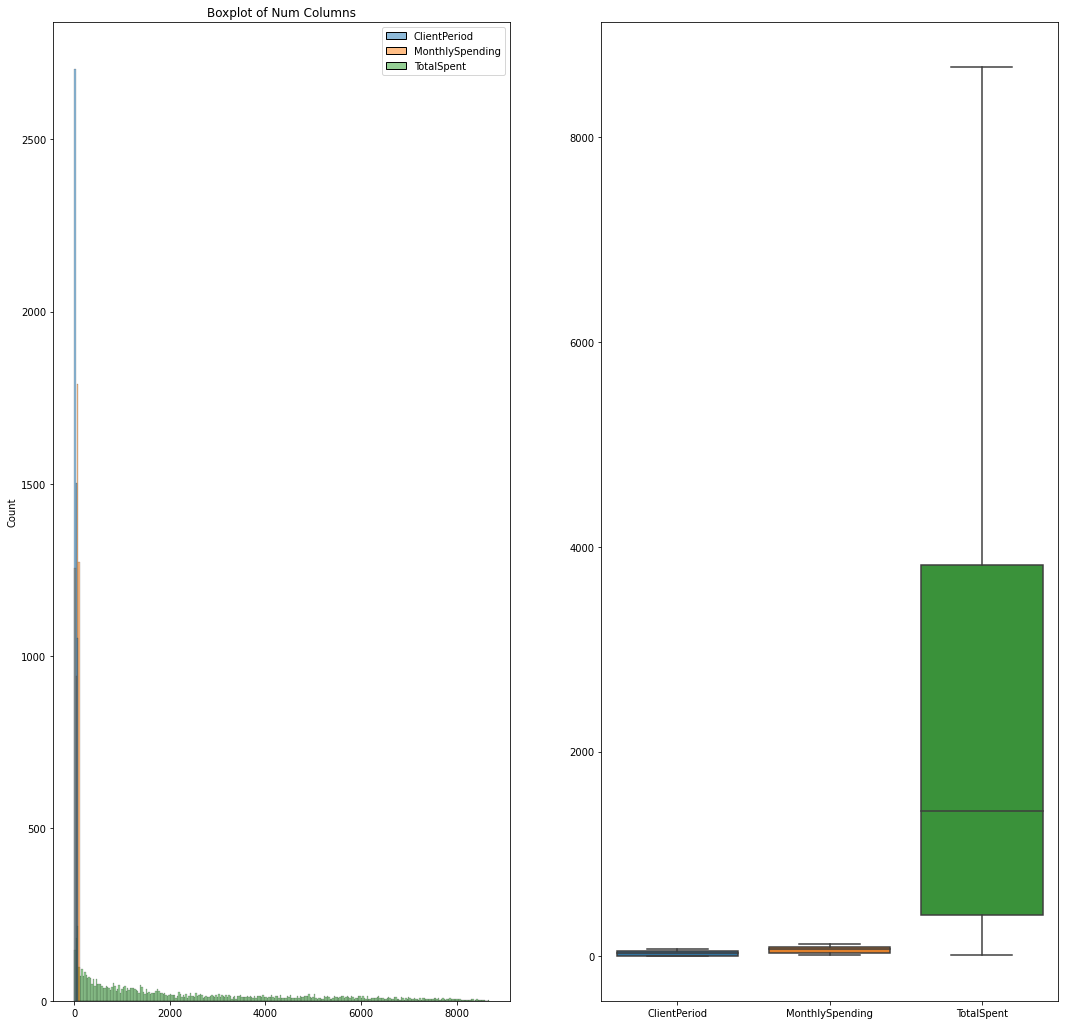

In [ ]:
# 1.

data.hist(column=num_cols, figsize=(14, 8)); # look at histograms for numbered features

fig, ax = plt.subplots(1, 2, figsize=(18,18))

ax = ax.ravel()

# Histogram of num columns
ax[0].set_title('Hist of Num Columns')
ax[0].hist(data[num_cols])

# Boxplot of num columns
ax[1].set_title('Boxplot of Num Columns')
ax[1].boxplot(x = data[num_cols],
            patch_artist=True,
            labels = ['ClientPeriod', 'MonthlySpending', 'TotalSpent'], # Feature name
            showmeans=True,
            boxprops = {'color':'black','facecolor':'#9999ff'},
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})
plt.tight_layout()


# pie charts for cat columns
fig, ax = plt.subplots(4, 4, figsize=(18,18))

ax = ax.ravel()

for i in range(0, len(cat_cols)):
    x = list(data[cat_cols[i]].value_counts().values)
    labels = list(data[cat_cols[i]].value_counts().index)

    ax[i].set_title(cat_cols[i])
#     ax[i].pie(x, labels = labels)
    ax[i].pie(x, labels = labels, autopct='%1.1f%%')
    ax[i].legend()

plt.tight_layout()

# bar plots for cat columns
fig, ax = plt.subplots(4, 4, figsize=(18,18))

ax = ax.ravel()

for i in range(0, len(cat_cols)):

    values = list(data[cat_cols[i]].value_counts().values)
    labels = list(data[cat_cols[i]].value_counts().index)
    y_pos = np.arange(len(labels))

    ax[i].set_title(cat_cols[i])
    ax[i].bar(y_pos, values, align='center', alpha=0.5)
    ax[i].set_xticks(y_pos, labels)
fig.show()

# amount of unique values in every column
print(data.nunique())

# 2.
# target values distribition - classes are not very unbalanced
print(data['Churn'].value_counts())

#target values distribution
plt.figure()
values = list(data[target_col].value_counts().values)
labels = list(data[target_col].value_counts().index)
y_pos = np.arange(len(labels))

plt.title(target_col)
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)

# 3.
import seaborn as sns

fig = plt.figure(figsize=(18,18))

plt.title('Hist of Num Columns')
plt.subplot(1, 2, 1)
sns.histplot(data = data[num_cols])

plt.title('Boxplot of Num Columns')
plt.subplot(1, 2, 2)
sns.boxplot(data = data[num_cols])

plt.show()


In additional, if we find any data errors or outliers, we can remove them. Here we can experiment with data processing as we like.
TODO in future...

## Application of linear models

1) We will process the data so that LogisticRegression can be applied to it. Namely, we will normalize numerical features, and encode categorical features using one-hot-encoding.

2) Using cross-validation or train/valid split, we will check different values of hyperparameter C and choose the best one (we will check C=100, 10, 1, 0.1, 0.01, 0.001) by the ROC-AUC metric.

If we are splitting by train/valid then use LogisticRegressionCV. When .fit() is called, it will pick up parameter C. (we also need to pass scroing='roc_auc' so that the values of this metric are compared during cross-validation, and refit=True, so that later the model is trained on the entire dataset with the best parameter C).

In addition, if we will use cross-validation, then data transformations and LogisticRegression need to be combined into one Pipeline using "make_pipeline". Then the pipeline must be passed to GridSearchCV. For one-hot-encoding, we will use the LabelEncoder + OneHotEncoder combination (first we turn the lines into numbers, and then we turn the numbers into one-hot vectors.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# One-Hot Encoding
cat_data = data[cat_cols]
num_data = data[num_cols]
dummy_features = pd.get_dummies(cat_data)

In [ ]:
X = pd.concat([num_data, dummy_features], axis=1)

X_origin = data.iloc[:,:-1]
y = data['Churn']
X.shape, X_origin.shape

((5259, 45), (5259, 19))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Train/Test splitting
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score

#hyperparameter C and number of cross-validation folds cv
Cs = [100, 10, 1, 0.1, 0.01, 0.001]
cv = 5

In [ ]:
# Logistic Regression
lr= LogisticRegression()

scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print('roc_auc of each fold is: ',scores_lr)
print('mean cv roc_auc is:', scores_lr.mean())

roc_auc of each fold is:  [0.81566004 0.83299816 0.85979359 0.8426726  0.86429718]
mean cv roc_auc is: 0.8430843146592671


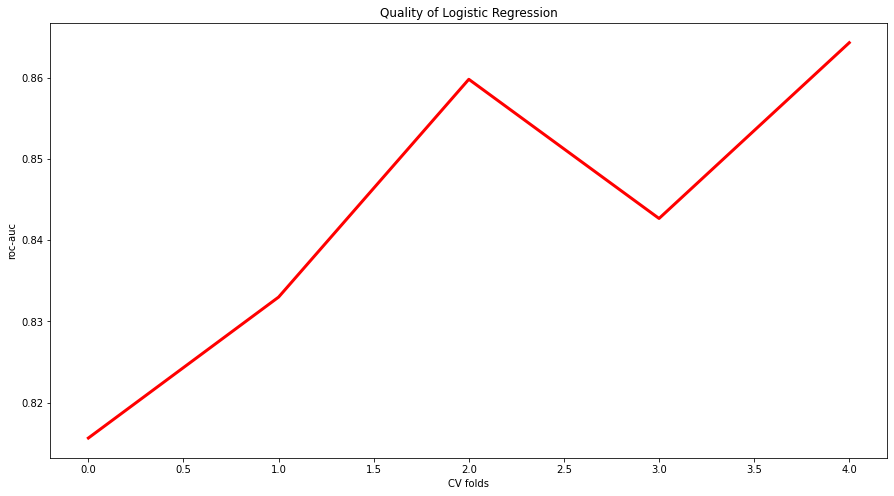

In [ ]:
grid = np.arange(cv)

plt.figure(figsize=(15,8))
plt.title('Quality of Logistic Regression')

plt.plot(grid, scores_lr, label='mean values', color='red', lw=3)
plt.xlabel('CV folds')
plt.ylabel('roc-auc')

plt.show()

In [ ]:
# Logistic Regression with L1 regularization
lrcv_L1 = LogisticRegressionCV(Cs=Cs,
                               cv = cv,
                               scoring='roc_auc',
                               refit=True,
                               penalty='l1',
                               solver='liblinear',
                               multi_class='ovr')

lrcv_L1.fit(X_train_scaled, y_train)
y_predicted_l1 = lrcv_L1.predict(X_test_scaled)

print(roc_auc_score(y_test, y_predicted_l1))

# Logistic Regression with L2 regularization
lrcv_L2 = LogisticRegressionCV(Cs=Cs,
                               cv = cv,
                               scoring='roc_auc',
                               refit=True,
                               penalty='l2',
                               solver='liblinear',
                               multi_class='ovr')

lrcv_L2.fit(X_train_scaled, y_train)
y_predicted_l2 = lrcv_L2.predict(X_test_scaled)

print(roc_auc_score(y_test, y_predicted_l2))


0.6934924694515487
0.6959837074926588


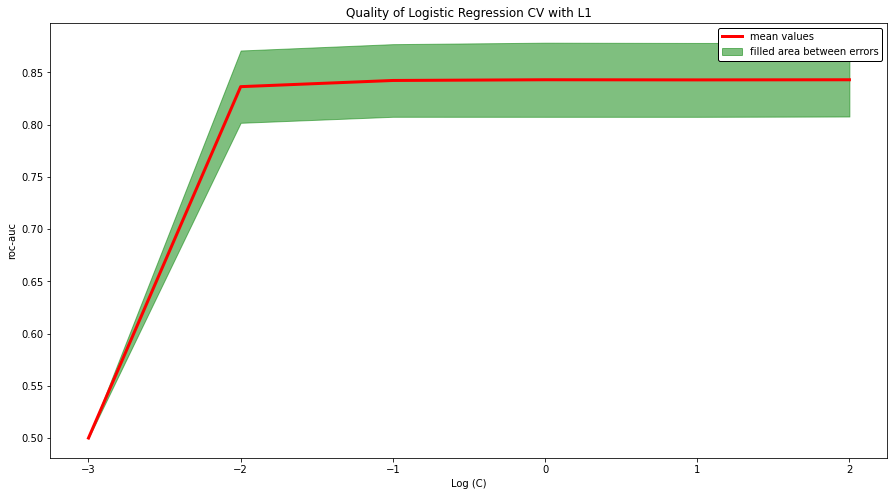

In [ ]:
#Plot for Logistic Regression with L1 regularization

scores_l1 = lrcv_L1.scores_[1]

mean_cross_val_score_l1 = scores_l1.mean(axis=0)
std_cross_val_score_l1 = scores_l1.std(axis=0)

grid = np.log10(Cs)

plt.figure(figsize=(15,8))
plt.title('Quality of Logistic Regression CV with L1')

plt.plot(grid, mean_cross_val_score_l1, label='mean values', color='red', lw=3)
plt.fill_between(grid,
                 mean_cross_val_score_l1 - 2 * std_cross_val_score_l1,
                 mean_cross_val_score_l1 + 2 * std_cross_val_score_l1,
                 color='green',
                 label='filled area between errors',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('Log (C)')
plt.ylabel('roc-auc')

plt.show()

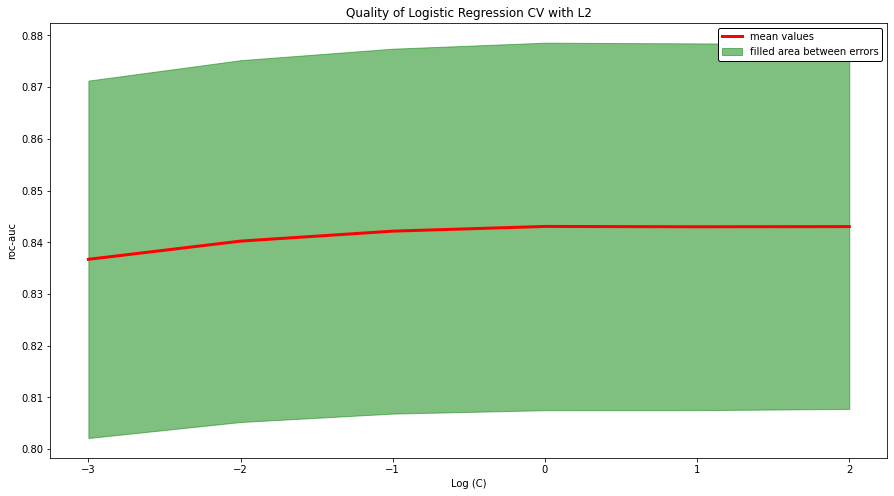

In [ ]:
# plot for Logistic Regression with L2 regularization

scores_l2 = lrcv_L2.scores_[1]

mean_cross_val_score_l2 = scores_l2.mean(axis=0)
std_cross_val_score_l2 = scores_l2.std(axis=0)

grid = np.log10(Cs)

plt.figure(figsize=(15,8))
plt.title('Quality of Logistic Regression CV with L2')

plt.plot(grid, mean_cross_val_score_l2, label='mean values', color='red', lw=3)
plt.fill_between(grid,
                 mean_cross_val_score_l2 - 2 * std_cross_val_score_l2,
                 mean_cross_val_score_l2 + 2 * std_cross_val_score_l2,
                 color='green',
                 label='filled area between errors',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('Log (C)')
plt.ylabel('roc-auc')

plt.show()

In [ ]:
# Copy the origin data in new variables
data_X = X_origin.copy()
data_y = y.copy()

# Train/Test splitting
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data_X,
    data_y,
    train_size=0.8,
    random_state=42)


numeric_transformer = make_pipeline(StandardScaler())

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'))

preprocessor = make_column_transformer(
    (numeric_transformer, num_cols),
    (categorical_transformer, cat_cols))

pipeline = Pipeline([("pp", preprocessor), ("lr", LogisticRegressionCV())])

parameters = {'lr__Cs': [100, 10, 1, 0.1, 0.01, 0.001],
             'lr__penalty': ['l1', 'l2']}

grid_pipeline = GridSearchCV(
    pipeline,
    param_grid = parameters,
    cv=5,
    scoring='roc_auc',
    refit=True,
    verbose=1,
    n_jobs=-1)
grid_pipeline.fit(data_X_train, data_y_train)
score = grid_pipeline.score(data_X_test, data_y_test)
print(grid_pipeline.best_params_)
print(score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/roman/PyProjects/PyProjects/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/roman/PyProjects/PyProjects/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/roman/PyProjects/PyProjects/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/roman/PyProjects/PyProjects/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

{'lr__Cs': 10, 'lr__penalty': 'l2'}
0.8431254144169745


Here we will write down what is the best quality and with what parameters we managed to get.

accuracy = 0.843
, lr_Cs = 10,
lr_penalty = l2

## Application of gradient boosting

Often gradient boosting with default settings will give you 80% results for 0% effort.

We will be using CatBoost so we don't have to encode categorical features. CatBoost will do this itself (in .fit() we will need to pass cat_features=cat_cols). And there is no need to normalize numerical features for models based on trees.

1) Divide the sample by train/valid. Train CatBoost with standard settings.

2) Check different values of the number of trees and learning_rate parameter and choose the best combination in terms of ROC-AUC metric.

Sometimes, there are some complications in using CatBoostClassifier with GridSearchCV, so we can try it for cross-validation.

In [ ]:
import catboost

In [ ]:
# Train/Test for origin data
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin.values, y.values,
                                                       train_size=0.8,
                                                       random_state=42)

categorical_indices = np.linspace(3, 18, 16, dtype=int)

X_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5259 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5259 non-null   int64  
 1   MonthlySpending           5259 non-null   float64
 2   TotalSpent                5259 non-null   float64
 3   Sex                       5259 non-null   object 
 4   IsSeniorCitizen           5259 non-null   int64  
 5   HasPartner                5259 non-null   object 
 6   HasChild                  5259 non-null   object 
 7   HasPhoneService           5259 non-null   object 
 8   HasMultiplePhoneNumbers   5259 non-null   object 
 9   HasInternetService        5259 non-null   object 
 10  HasOnlineSecurityService  5259 non-null   object 
 11  HasOnlineBackup           5259 non-null   object 
 12  HasDeviceProtection       5259 non-null   object 
 13  HasTechSupportAccess      5259 non-null   object 
 14  HasOnlin

In [ ]:
#Catboost model
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=categorical_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.083239
0:	learn: 0.6407802	total: 58.9ms	remaining: 11.7s
1:	learn: 0.6007125	total: 64.5ms	remaining: 6.39s
2:	learn: 0.5713573	total: 69.3ms	remaining: 4.55s
3:	learn: 0.5435813	total: 75.5ms	remaining: 3.7s
4:	learn: 0.5263733	total: 78.6ms	remaining: 3.06s
5:	learn: 0.5060032	total: 84ms	remaining: 2.71s
6:	learn: 0.4924545	total: 105ms	remaining: 2.89s
7:	learn: 0.4810979	total: 111ms	remaining: 2.66s
8:	learn: 0.4702059	total: 117ms	remaining: 2.49s
9:	learn: 0.4612942	total: 123ms	remaining: 2.33s
10:	learn: 0.4560320	total: 127ms	remaining: 2.17s
11:	learn: 0.4478512	total: 132ms	remaining: 2.06s
12:	learn: 0.4411434	total: 136ms	remaining: 1.96s
13:	learn: 0.4361667	total: 141ms	remaining: 1.88s
14:	learn: 0.4313460	total: 147ms	remaining: 1.81s
15:	learn: 0.4281168	total: 154ms	remaining: 1.77s
16:	learn: 0.4262946	total: 157ms	remaining: 1.69s
17:	learn: 0.4245702	total: 160ms	remaining: 1.61s
18:	learn: 0.4221462	total: 165ms	remaining: 1.57s
19:	lear

160:	learn: 0.3494677	total: 1.02s	remaining: 246ms
161:	learn: 0.3488264	total: 1.03s	remaining: 241ms
162:	learn: 0.3487707	total: 1.03s	remaining: 234ms
163:	learn: 0.3486528	total: 1.04s	remaining: 228ms
164:	learn: 0.3485504	total: 1.05s	remaining: 222ms
165:	learn: 0.3484773	total: 1.05s	remaining: 216ms
166:	learn: 0.3481351	total: 1.06s	remaining: 209ms
167:	learn: 0.3474345	total: 1.06s	remaining: 203ms
168:	learn: 0.3472458	total: 1.07s	remaining: 197ms
169:	learn: 0.3468890	total: 1.08s	remaining: 190ms
170:	learn: 0.3468246	total: 1.08s	remaining: 184ms
171:	learn: 0.3460174	total: 1.09s	remaining: 177ms
172:	learn: 0.3453851	total: 1.1s	remaining: 171ms
173:	learn: 0.3449652	total: 1.1s	remaining: 165ms
174:	learn: 0.3447808	total: 1.11s	remaining: 158ms
175:	learn: 0.3446903	total: 1.11s	remaining: 152ms
176:	learn: 0.3446491	total: 1.12s	remaining: 146ms
177:	learn: 0.3446338	total: 1.13s	remaining: 139ms
178:	learn: 0.3441706	total: 1.13s	remaining: 133ms
179:	learn: 0.

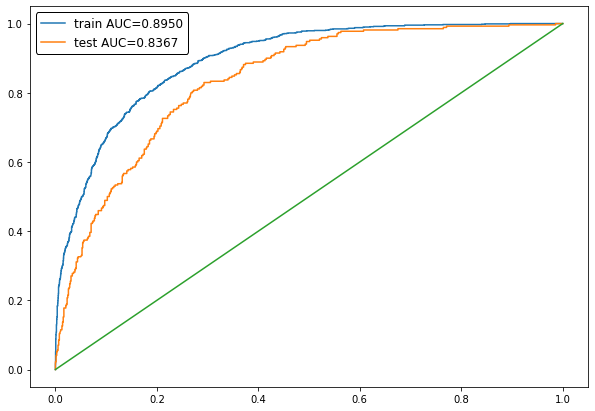

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

# plot metrics for CatBoost model
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=categorical_indices,
                                             eval_metric='AUC')
#Trying the different parameters, but no better results :(
# boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20),
#                             'iterations':[300, 400, 500],
#                             'depth': [1, 2, 3],
#                             'learning_rate': [0.01, 0.03, 0.05]},
#                             X_train_origin,
#                             y_train, plot=True, refit=True)

# the best results with this CatBoost L2 model
boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)},
                            X_train_origin,
                            y_train, plot=True, refit=True)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8400903505
bestIteration = 87

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8400904	best: 0.8400904 (0)	total: 1.69s	remaining: 32.1s

bestTest = 0.8436249682
bestIteration = 166

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8436250	best: 0.8436250 (1)	total: 2.91s	remaining: 26.2s

bestTest = 0.8412929685
bestIteration = 174

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8412930	best: 0.8436250 (1)	total: 4s	remaining: 22.7s

bestTest = 0.8412698413
bestIteration = 145

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8412698	best: 0.8436250 (1)	total: 5.11s	remaining: 20.4s

bestTes

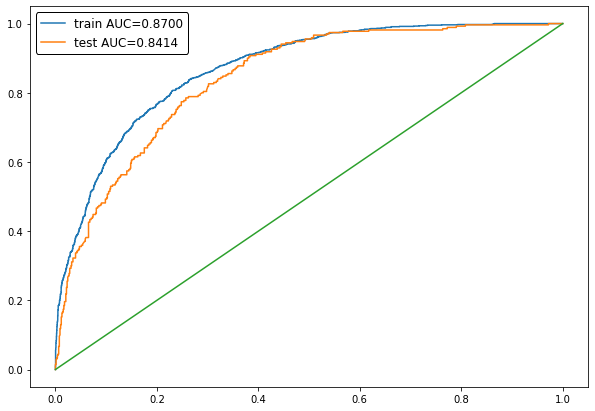

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

# plot metrics for Catboost model
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Here we will write down what is the best quality and with what parameters we managed to get.

train AUC = 0.8700
test AUC = 0.8414

# Predictions (submit on Kaggle)

In [ ]:
best_model = boosting_model

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')